In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [217]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


tidak ada missing values, gender perlu di encode karena bukan numerical

In [219]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


1. Customer ID: ada sebanyak 200 pelanggan dengan ID 1-200
2. Age: Rata-rata usia pelanggan adalah 38.85 tahun, dengan usia termuda adalah 18 tahun dan yang paling tua adalah 70 tahun. Dari sini kita dapat tahu terdapat pelanggan dari berbagai kelompok umur, tetapi kebanyakan pelanggan berada di usia dewasa hingga paruh baya.
3. Annual Income: Rata-rata pendapatan tahunan pelanggan sekitar $60.56 ribu, dengan variasi sebesar 26.26. Pendapatan terendah adalah $15 ribu dan yang tertinggi $137 ribu. Hal ini menunjukkan segmen pelanggan adalah ekonomi menengah hingga tinggi.
4. Spending score: Rata-rata belanja adalah 50.2 dengan variasi sebesar 25.82. Hal ini menunjukkan adanya variasi dalam perilaku belanja, ada yang hemat ada juga yang boros.

In [220]:
# rename the column
df = df.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)": "Spending Score"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Encoding

In [221]:
# Gender Encoding to make it numerical

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


# Visualization

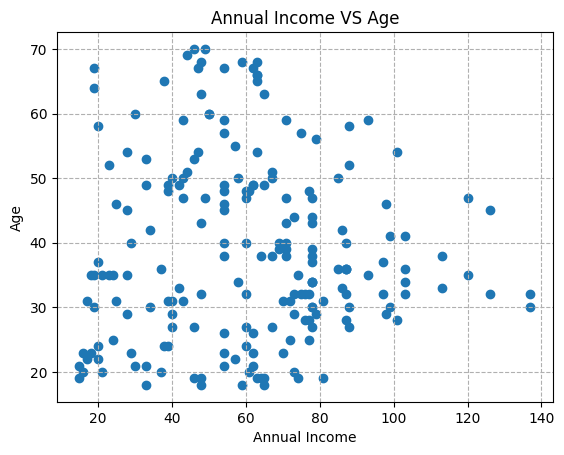

In [222]:
# Scatter plot: Annual Income vs Age

plt.scatter(df['Annual Income'], df['Age'])
plt.title('Annual Income VS Age')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

Dari scatter plot Annual Income vs Age di atas, terlihat bahwa tidak ada hubungan yang kuat antara usia dan pendapatan tahunan pelanggan. Titik-titik data tersebar secara acak di seluruh rentang umur dan pendapatan, menandakan bahwa pendapatan tinggi tidak terbatas pada kelompok usia tertentu. Namun, sebagian besar pelanggan dengan pendapatan tahunan menengah (sekitar $40–$80 ribu berasal dari rentang usia 20 hingga 50 tahun, menunjukkan bahwa kelompok usia produktif mendominasi populasi pelanggan. Sementara itu, pelanggan berusia di atas 60 tahun cenderung lebih sedikit, dan distribusinya tidak menunjukkan pola pendapatan yang konsisten.

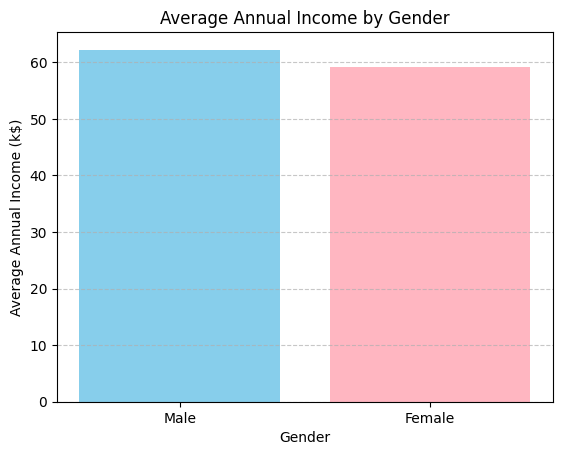

In [223]:
# Bar chart: Average Annual Income vs Gender

gender_labels = {0: 'Male', 1: 'Female'}

avg_income = df.groupby('Gender')['Annual Income'].mean().reset_index()
avg_income['Gender'] = avg_income['Gender'].map(gender_labels)

plt.bar(avg_income['Gender'], avg_income['Annual Income'], color=['skyblue', 'lightpink'])
plt.title('Average Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Annual Income (k$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bar Chart tersebut menunjukkan bahwa rata-rata pendapatan tahunan antara pelanggan laki-laki dan perempuan tidak memiliki perbedaan yang signifikan. Pelanggan laki-laki memiliki pendapatan rata-rata sedikit lebih tinggi, sekitar $62.000 per tahun, dibandingkan perempuan dengan rata-rata sekitar $59.000 per tahun. Perbedaan ini relatif kecil, sehingga dapat disimpulkan bahwa pendapatan tahunan pelanggan relatif seimbang antar gender. Hasil tersebut juga menunjukkan bahwa distribusi daya beli antara laki-laki dan perempuan dalam dataset ini cukup merata.

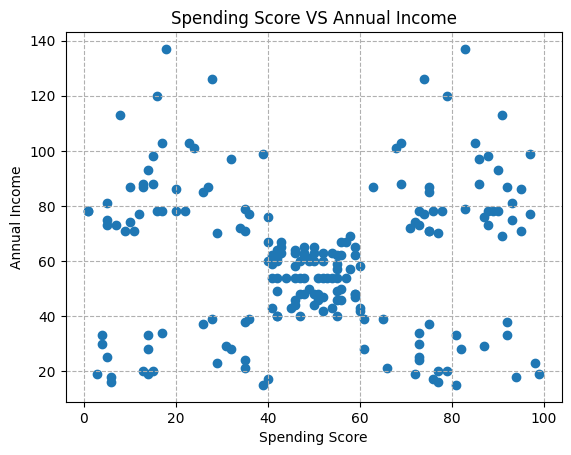

In [224]:
# Scatter plot: Spending Score vs Annual Income

plt.scatter(df['Spending Score'], df['Annual Income'])
plt.title('Spending Score VS Annual Income')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.grid(axis='both', linestyle='--')
plt.show()

Scatter plot Spending Score vs Annual Income menunjukkan bahwa tidak ada hubungan yang jelas antara pendapatan tahunan dan tingkat pengeluaran pelanggan. Beberapa pelanggan dengan pendapatan tinggi justru memiliki skor belanja rendah, sementara sebagian pelanggan berpendapatan menengah hingga rendah memiliki skor belanja tinggi. Pola ini menandakan bahwa perilaku belanja tidak selalu dipengaruhi oleh tingkat pendapatan, dan terdapat segmen pelanggan dengan karakteristik pengeluaran yang berbeda, yang dapat menjadi dasar untuk analisis segmentasi lebih lanjut.

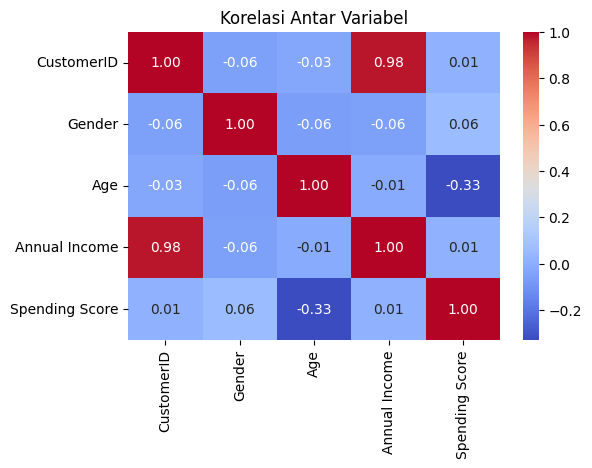

In [225]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel')
plt.show()

Berdasarkan hasil heatmap korelasi antar variabel, terlihat bahwa CustomerID dan Annual Income memiliki korelasi yang sangat tinggi (0.98). Namun, karena CustomerID hanya merupakan identitas unik setiap pelanggan, korelasi tersebut tidak memiliki makna analitis dan dapat diabaikan. Selain itu, Age memiliki korelasi negatif moderat dengan Spending Score (-0.33), yang menunjukkan bahwa semakin tua usia pelanggan, kecenderungannya untuk memiliki skor pengeluaran yang tinggi semakin rendah. Sementara itu, variabel Gender tidak memiliki hubungan yang signifikan dengan Spending Score maupun Annual Income, menandakan bahwa perbedaan jenis kelamin tidak terlalu memengaruhi tingkat pendapatan maupun perilaku belanja pelanggan.

In [226]:
# create new dataframe that consist only annual income and spending score
df = df[['Spending Score', 'Annual Income']]
df.head()

,Spending Score,Annual Income
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


# Data Scaling (Choose One)

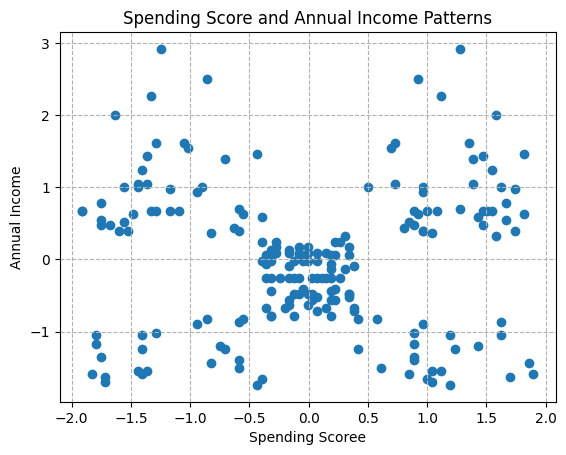

In [227]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Spending Score", "Annual Income"])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Spending Score"], df_sc_scaled["Annual Income"])
plt.xlabel("Spending Scoree")
plt.ylabel("Annual Income")
plt.grid(axis='both', linestyle='--')
plt.title("Spending Score and Annual Income Patterns")
plt.show()

# K-Means Clustering

In [228]:
from sklearn.cluster import KMeans

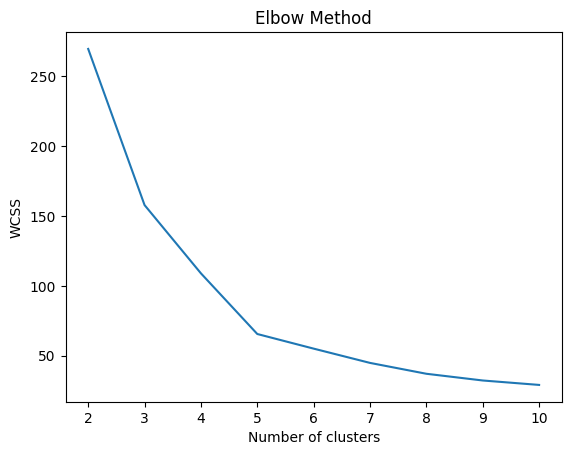

In [229]:
wcss = []
for i in range(2, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [230]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   2  269.299343
1                   3  157.704008
2                   4  108.921317
3                   5   65.568408
4                   6   55.114226
5                   7   44.911186
6                   8   37.148117
7                   9   32.345838
8                  10   29.178990


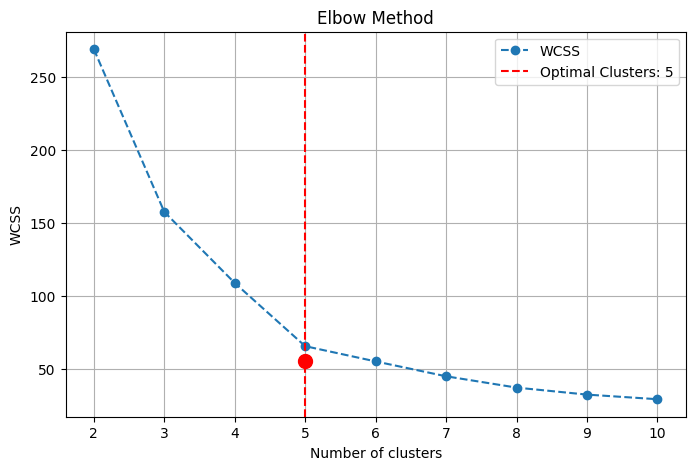

The optimal number of clusters is: 5


In [231]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

Berdasarkan hasil metode Elbow pada grafik di atas, terlihat bahwa nilai Within-Cluster Sum of Squares (WCSS) menurun tajam hingga titik K = 5, kemudian penurunannya mulai melandai setelahnya. Titik ini menandakan “siku” pada grafik, yang menunjukkan bahwa jumlah klaster optimal adalah 5. Artinya, membagi data ke dalam 5 klaster memberikan keseimbangan terbaik antara jumlah klaster yang cukup detail dan variasi antar klaster yang masih signifikan, tanpa menimbulkan overfitting atau redundansi dalam segmentasi data.

In [232]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Spending Score,Annual Income,KMeans_Cluster
0,39,15,3
1,81,15,4
2,6,16,3
3,77,16,4
4,40,17,3


C:\Users\miche\AppData\Local\Temp\ipykernel_39792\2109996420.py:4: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Spending Score", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


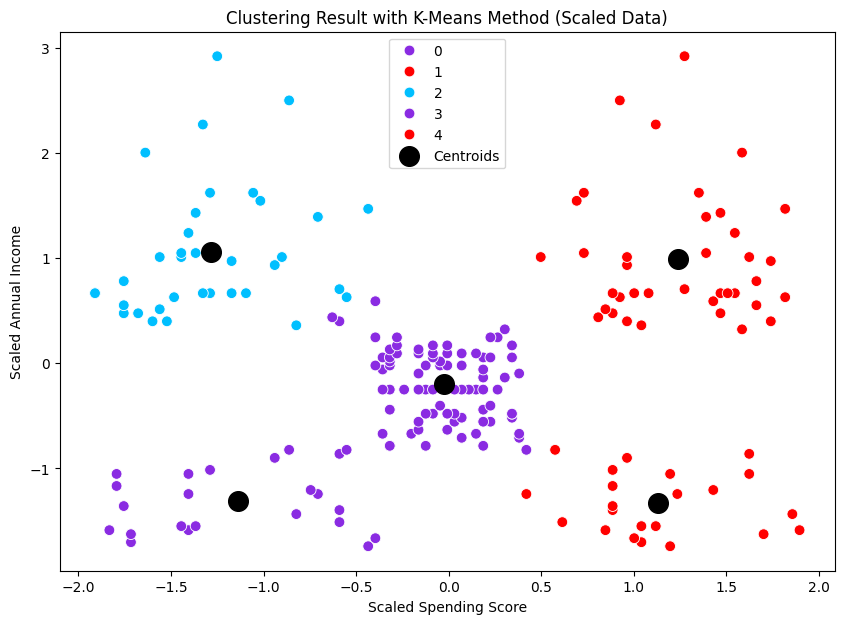

In [233]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Spending Score", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Spending Score")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

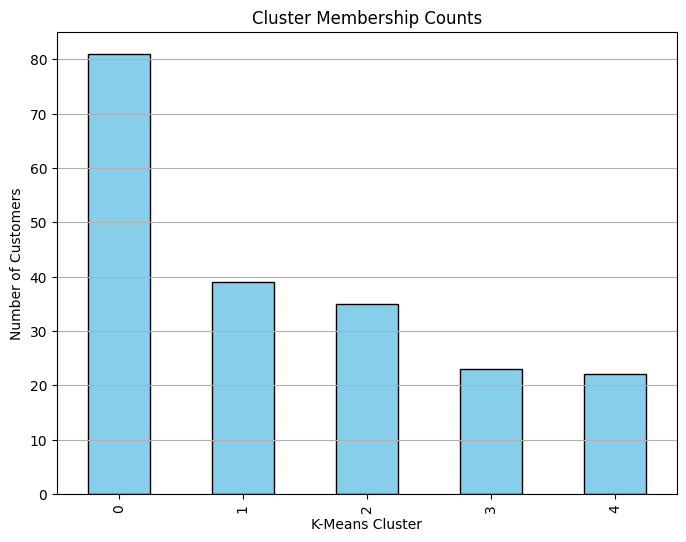

In [234]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [235]:
# reload the full dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df_full = pd.read_csv(url)

# Add the cluster labels from your current df (based on income & spending)
df_full['KMeans_Cluster'] = df['KMeans_Cluster']

# Now df_full has all columns (Gender, Age, etc.) + the cluster label
df_full.head()

# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_full.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'median', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'median', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'median', 'min', 'max'],
    'Gender': lambda x: x.mode()[0]
})
cluster_summary

Age                Annual Income (k$)                  \
                     mean median min max               mean median min  max   
KMeans_Cluster                                                                
0               42.716049   46.0  18  70          55.296296   54.0  39   76   
1               32.692308   32.0  27  40          86.538462   79.0  69  137   
2               41.114286   42.0  19  59          88.200000   85.0  70  137   
3               45.217391   46.0  19  67          26.304348   25.0  15   39   
4               25.272727   23.5  18  35          25.727273   24.5  15   39   

               Spending Score (1-100)                  Gender  
                                 mean median min max <lambda>  
KMeans_Cluster                                                 
0                           49.518519   50.0  34  61   Female  
1                           82.128205   83.0  63  97   Female  
2                           17.114286   16.0   1  39     Male  
3                           20.913043   17.0   3  40   Female  
4                           79.363636   77.0  61  99   Female

# Managerial Implications Based on the Five Clusters
Cluster 0 – Middle-Aged / Moderate-Income Consumers

Profile:

Rata-rata usia 43 tahun (18–70).

Pendapatan menengah (~$55K).

Spending score moderat (rata-rata 49).

Didominasi oleh perempuan.

Implications:
Kelompok ini cenderung berbelanja dengan pertimbangan matang antara kebutuhan dan kemampuan finansial. Strategi pemasaran sebaiknya menonjolkan nilai dan kepraktisan produk, seperti kualitas tahan lama dan harga yang sepadan. Program loyalitas atau promosi musiman dapat membantu meningkatkan frekuensi pembelian.

Cluster 1 – Young / High-Income Big Spenders

Profile:

Usia relatif muda, sekitar 32 tahun.

Pendapatan tinggi (~$86K).

Spending score sangat tinggi (rata-rata 82).

Didominasi oleh perempuan.

Implications:
Kelompok ini merupakan target ideal untuk produk premium dan gaya hidup modern. Mereka responsif terhadap tren, influencer marketing, dan pengalaman eksklusif. Perusahaan sebaiknya menawarkan produk berdesain menarik dengan pendekatan emosional, serta menciptakan brand engagement yang kuat melalui media digital dan komunitas.

Cluster 2 – Mature / High-Income Low Spenders

Profile:

Usia rata-rata 41 tahun.

Pendapatan tinggi (~$88K).

Spending score sangat rendah (rata-rata 17).

Didominasi oleh laki-laki.

Implications:
Meskipun memiliki pendapatan besar, kelompok ini cenderung berhati-hati dalam pengeluaran. Fokus pemasaran sebaiknya pada fungsi, keandalan, dan nilai investasi produk. Tawarkan program membership jangka panjang atau produk bernilai guna tinggi seperti barang kebutuhan utama atau investasi jangka panjang.

Cluster 3 – Mature / Low-Income Low Spenders

Profile:

Usia sekitar 45 tahun.

Pendapatan rendah (~$26K).

Spending score rendah (~21).

Didominasi oleh perempuan.

Implications:
Kelompok ini sensitif terhadap harga dan kemungkinan besar berbelanja untuk kebutuhan pokok. Strategi terbaik adalah menyediakan produk terjangkau dan promosi diskon rutin. Komunikasi pemasaran sebaiknya menonjolkan efisiensi biaya dan manfaat praktis.

Cluster 4 – Young / Low-Income High Spenders

Profile:

Usia muda, rata-rata 25 tahun.

Pendapatan rendah (~$25K).

Spending score tinggi (~79).

Didominasi oleh perempuan.

Implications:
Meskipun berpendapatan rendah, kelompok ini memiliki perilaku konsumtif tinggi dan tertarik pada gaya hidup. Mereka bisa menjadi target ideal untuk produk trendi berharga terjangkau. Gunakan kampanye media sosial, limited edition, dan kemudahan pembayaran (installment plan atau buy now pay later) untuk menarik perhatian mereka.